In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("../data/Processed/data_merge_v2.csv")

print(df.shape)
print(df.columns)
print(df.head())
print(df.info())

(5890, 29)
Index(['lib_mrq', 'lib_mod_doss', 'lib_mod', 'dscom', 'cod_cbr', 'hybride',
       'puiss_admin_98', 'puiss_max', 'conso_urb', 'conso_exurb',
       'conso_mixte', 'co2', 'co_typ_1', 'nox', 'ptcl', 'masse_ordma_min',
       'masse_ordma_max', 'champ_v9', 'Carrosserie', 'gamme', 'Mp', 'Ct',
       'W (mm)', 'At1 (mm)', 'At2 (mm)', 'ec (cm3)', 'typ_boite', 'nb_rapp',
       'category'],
      dtype='object')
      lib_mrq lib_mod_doss    lib_mod                        dscom cod_cbr  \
0  ALFA-ROMEO          159        159         159 2.0 JTDm (170ch)      GO   
1  ALFA-ROMEO          159        159     159 2.0 JTDm (170ch) ECO      GO   
2  ALFA-ROMEO          159        159      159 SW 2.0 JTDm (170ch)      GO   
3  ALFA-ROMEO          159        159  159 SW 2.0 JTDm (170ch) ECO      GO   
4  ALFA-ROMEO  AR8C SPIDER  8C SPIDER                    8C SPIDER      ES   

  hybride  puiss_admin_98  puiss_max  conso_urb  conso_exurb   ...     \
0     non               9      125.0 

**Etude 1**

Dans cette première étude, on va juste tester des modèles simples sur les variables conso_mixte, puiss_max et ec (cm3)

**Only "conso_mixte"**

In [4]:
X = df[["conso_mixte"]]

y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])

print(X.head())
print(y.head())

   conso_mixte
0     5.300000
1     5.100000
2     5.400000
3     5.200000
4    16.299999
0    2
1    2
2    3
3    2
4    6
Name: category, dtype: int64


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [6]:
clf = LogisticRegression(C=1)
clf.fit(X_train_scaler,y_train)

print("Logistic Regression",clf.score(X_train_scaler,y_train))
print("Logistic Regression",clf.score(X_test_scaler,y_test))

y_pred = clf.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

Logistic Regression 0.6782682512733447
Logistic Regression 0.7122241086587436
             precision    recall  f1-score   support

          0       1.00      0.79      0.88       145
          1       0.77      0.96      0.85       340
          2       0.76      0.72      0.74       298
          3       0.51      0.74      0.61       211
          4       0.54      0.17      0.26       161
          5       0.00      0.00      0.00        14
          6       0.00      0.00      0.00         9

avg / total       0.70      0.71      0.69      1178

col_0       0    1    2    3   4
category                        
0         115   30    0    0   0
1           0  325   13    2   0
2           0   68  215   15   0
3           0    0   54  157   0
4           0    0    0  134  27
5           0    0    0    0  14
6           0    0    0    0   9


C:\Users\UGO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaler,y_train)

print(knn.score(X_train_scaler,y_train))
print(knn.score(X_test_scaler,y_test))

y_pred = knn.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

0.8240662139219015
0.8488964346349746
             precision    recall  f1-score   support

          0       0.79      0.97      0.87       145
          1       0.99      0.80      0.88       340
          2       0.87      0.90      0.88       298
          3       0.69      0.92      0.79       211
          4       0.92      0.65      0.76       161
          5       1.00      0.93      0.96        14
          6       1.00      1.00      1.00         9

avg / total       0.87      0.85      0.85      1178

col_0       0    1    2    3    4   5  6
category                                
0         141    4    0    0    0   0  0
1          37  271   30    1    1   0  0
2           0    0  267   31    0   0  0
3           0    0    9  195    7   0  0
4           0    0    0   57  104   0  0
5           0    0    0    0    1  13  0
6           0    0    0    0    0   0  9


In [8]:
rforest = RandomForestClassifier(n_jobs = -1,random_state = 64)
rforest.fit(X_train_scaler,y_train)

print(rforest.score(X_train_scaler,y_train))
print(rforest.score(X_test_scaler,y_test))

y_pred = rforest.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

0.825339558573854
0.8514431239388794
             precision    recall  f1-score   support

          0       1.00      0.79      0.88       145
          1       0.91      0.91      0.91       340
          2       0.89      0.84      0.86       298
          3       0.65      0.99      0.79       211
          4       0.99      0.61      0.75       161
          5       0.93      1.00      0.97        14
          6       1.00      1.00      1.00         9

avg / total       0.88      0.85      0.85      1178

col_0       0    1    2    3   4   5  6
category                               
0         115   30    0    0   0   0  0
1           0  308   30    1   1   0  0
2           0    0  250   48   0   0  0
3           0    0    2  209   0   0  0
4           0    0    0   62  98   1  0
5           0    0    0    0   0  14  0
6           0    0    0    0   0   0  9


**Only puiss_max**

In [9]:
X = df[["puiss_max"]]
y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])

#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

###LogisticRegression
clf = LogisticRegression(C=1)
clf.fit(X_train_scaler,y_train)

print("LOGISTIC REGRESSION")
print("Logistic Regression train: ",clf.score(X_train_scaler,y_train))
print("Logistic Regression test : ",clf.score(X_test_scaler,y_test))

y_pred = clf.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaler,y_train)

print("\n\n")
print("KNN")
print("KNN train : ",knn.score(X_train_scaler,y_train))
print("KNN test : ",knn.score(X_test_scaler,y_test))

y_pred = knn.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#RandomForest
rforest = RandomForestClassifier(n_jobs = -1,random_state = 64)
rforest.fit(X_train_scaler,y_train)

print("\n\n")
print("RANDOM FOREST")
print("Random Forest train : ",rforest.score(X_train_scaler,y_train))
print("Random Forest test : ",rforest.score(X_test_scaler,y_test))

y_pred = rforest.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

LOGISTIC REGRESSION
Logistic Regression train:  0.35250424448217316
Logistic Regression test :  0.366723259762309
             precision    recall  f1-score   support

          0       0.49      0.30      0.37       145
          1       0.38      0.63      0.47       340
          2       0.33      0.37      0.35       298
          3       0.31      0.28      0.30       211
          4       0.00      0.00      0.00       161
          5       0.00      0.00      0.00        14
          6       1.00      0.78      0.88         9

avg / total       0.32      0.37      0.33      1178

col_0      0    1    2   3  6
category                     
0         43   93    6   3  0
1         42  213   63  22  0
2          2  137  109  50  0
3          0   78   73  60  0
4          0   42   73  46  0
5          0    0    2  12  0
6          0    0    0   2  7



KNN
KNN train :  0.47877758913412566
KNN test :  0.5118845500848896
             precision    recall  f1-score   support

          0

C:\Users\UGO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)





RANDOM FOREST
Random Forest train :  0.5418081494057725
Random Forest test :  0.5585738539898133
             precision    recall  f1-score   support

          0       0.63      0.46      0.53       145
          1       0.53      0.66      0.59       340
          2       0.57      0.42      0.48       298
          3       0.61      0.68      0.64       211
          4       0.47      0.48      0.48       161
          5       0.85      0.79      0.81        14
          6       1.00      0.89      0.94         9

avg / total       0.56      0.56      0.55      1178

col_0      0    1    2    3   4   5  6
category                              
0         67   69    3    0   6   0  0
1         39  224   55    9  13   0  0
2          1   94  126   43  34   0  0
3          0    7   25  144  34   1  0
4          0   31   11   41  78   0  0
5          0    0    2    1   0  11  0
6          0    0    0    0   0   1  8


**ec (cm3)**

In [10]:
X = df[["ec (cm3)"]]
y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])

#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

###LogisticRegression
clf = LogisticRegression(C=1)
clf.fit(X_train_scaler,y_train)

print("LOGISTIC REGRESSION")
print("Logistic Regression train: ",clf.score(X_train_scaler,y_train))
print("Logistic Regression test : ",clf.score(X_test_scaler,y_test))

y_pred = clf.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaler,y_train)

print("\n\n")
print("KNN")
print("KNN train : ",knn.score(X_train_scaler,y_train))
print("KNN test : ",knn.score(X_test_scaler,y_test))

y_pred = knn.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#RandomForest
rforest = RandomForestClassifier(n_jobs = -1,random_state = 64)
rforest.fit(X_train_scaler,y_train)

print("\n\n")
print("RANDOM FOREST")
print("Random Forest train : ",rforest.score(X_train_scaler,y_train))
print("Random Forest test : ",rforest.score(X_test_scaler,y_test))

y_pred = rforest.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

LOGISTIC REGRESSION
Logistic Regression train:  0.30708828522920206
Logistic Regression test :  0.34295415959252973
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       145
          1       0.34      0.79      0.48       340
          2       0.30      0.31      0.30       298
          3       0.00      0.00      0.00       211
          4       0.42      0.22      0.29       161
          5       0.00      0.00      0.00        14
          6       0.89      0.89      0.89         9

avg / total       0.24      0.34      0.26      1178

col_0       1   2   4  6
category                
0         136   9   0  0
1         269  67   4  0
2         188  91  18  1
3         146  50  15  0
4          45  80  36  0
5           0   2  12  0
6           0   0   1  8



KNN
KNN train :  0.41256366723259763
KNN test :  0.4074702886247878
             precision    recall  f1-score   support

          0       0.32      0.76      0.45       145
 

C:\Users\UGO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)





RANDOM FOREST
Random Forest train :  0.5568760611205433
Random Forest test :  0.567062818336163
             precision    recall  f1-score   support

          0       0.55      0.53      0.54       145
          1       0.58      0.57      0.58       340
          2       0.51      0.56      0.54       298
          3       0.58      0.67      0.62       211
          4       0.60      0.43      0.50       161
          5       1.00      0.79      0.88        14
          6       1.00      0.89      0.94         9

avg / total       0.57      0.57      0.57      1178

col_0      0    1    2    3   4   5  6
category                              
0         77   60    6    2   0   0  0
1         54  194   65   20   7   0  0
2          8   65  168   40  17   0  0
3          0   10   41  141  19   0  0
4          0    4   49   39  69   0  0
5          0    0    0    0   3  11  0
6          0    1    0    0   0   0  8


**conso_mixte + puiss_max**

In [11]:
X = df[["conso_mixte","puiss_max"]]
y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])

#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

###LogisticRegression
clf = LogisticRegression(C=1)
clf.fit(X_train_scaler,y_train)

print("LOGISTIC REGRESSION")
print("Logistic Regression train: ",clf.score(X_train_scaler,y_train))
print("Logistic Regression test : ",clf.score(X_test_scaler,y_test))

y_pred = clf.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaler,y_train)

print("\n\n")
print("KNN")
print("KNN train : ",knn.score(X_train_scaler,y_train))
print("KNN test : ",knn.score(X_test_scaler,y_test))

y_pred = knn.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#RandomForest
rforest = RandomForestClassifier(n_jobs = -1,random_state = 64)
rforest.fit(X_train_scaler,y_train)

print("\n\n")
print("RANDOM FOREST")
print("Random Forest train : ",rforest.score(X_train_scaler,y_train))
print("Random Forest test : ",rforest.score(X_test_scaler,y_test))

y_pred = rforest.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

LOGISTIC REGRESSION
Logistic Regression train:  0.634974533106961
Logistic Regression test :  0.6706281833616299
             precision    recall  f1-score   support

          0       0.94      0.67      0.78       145
          1       0.75      0.94      0.84       340
          2       0.62      0.68      0.65       298
          3       0.48      0.46      0.47       211
          4       0.61      0.43      0.50       161
          5       0.00      0.00      0.00        14
          6       1.00      0.33      0.50         9

avg / total       0.67      0.67      0.66      1178

col_0      0    1    2   3   4  5  6
category                            
0         97   48    0   0   0  0  0
1          6  319   13   0   2  0  0
2          0   56  204  38   0  0  0
3          0    0   88  98  25  0  0
4          0    0   24  68  69  0  0
5          0    0    0   1  13  0  0
6          0    0    0   0   5  1  3



KNN
KNN train :  0.9898132427843803
KNN test :  0.9881154499151104
    

**conso_mixte + ec (cm3)**

In [12]:
X = df[["conso_mixte","ec (cm3)"]]
y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])

#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

###LogisticRegression
clf = LogisticRegression(C=1)
clf.fit(X_train_scaler,y_train)

print("LOGISTIC REGRESSION")
print("Logistic Regression train: ",clf.score(X_train_scaler,y_train))
print("Logistic Regression test : ",clf.score(X_test_scaler,y_test))

y_pred = clf.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaler,y_train)

print("\n\n")
print("KNN")
print("KNN train : ",knn.score(X_train_scaler,y_train))
print("KNN test : ",knn.score(X_test_scaler,y_test))

y_pred = knn.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#RandomForest
rforest = RandomForestClassifier(n_jobs = -1,random_state = 64)
rforest.fit(X_train_scaler,y_train)

print("\n\n")
print("RANDOM FOREST")
print("Random Forest train : ",rforest.score(X_train_scaler,y_train))
print("Random Forest test : ",rforest.score(X_test_scaler,y_test))

y_pred = rforest.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

LOGISTIC REGRESSION
Logistic Regression train:  0.6305178268251274
Logistic Regression test :  0.6536502546689303
             precision    recall  f1-score   support

          0       0.96      0.77      0.85       145
          1       0.82      0.95      0.88       340
          2       0.60      0.60      0.60       298
          3       0.43      0.67      0.52       211
          4       0.41      0.08      0.13       161
          5       0.00      0.00      0.00        14
          6       0.75      0.33      0.46         9

avg / total       0.64      0.65      0.63      1178

col_0       0    1    2    3   4  5  6
category                              
0         111   34    0    0   0  0  0
1           5  323    1   11   0  0  0
2           0   39  179   79   0  0  1
3           0    0   70  141   0  0  0
4           0    0   48  100  13  0  0
5           0    0    0    0  14  0  0
6           0    0    0    0   5  1  3



KNN
KNN train :  0.9940577249575552
KNN test :  0.98

**ec (cm3) + puiss_max**

In [13]:
X = df[["ec (cm3)","puiss_max"]]
y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])

#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

###LogisticRegression
clf = LogisticRegression(C=1)
clf.fit(X_train_scaler,y_train)

print("LOGISTIC REGRESSION")
print("Logistic Regression train: ",clf.score(X_train_scaler,y_train))
print("Logistic Regression test : ",clf.score(X_test_scaler,y_test))

y_pred = clf.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaler,y_train)

print("\n\n")
print("KNN")
print("KNN train : ",knn.score(X_train_scaler,y_train))
print("KNN test : ",knn.score(X_test_scaler,y_test))

y_pred = knn.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#RandomForest
rforest = RandomForestClassifier(n_jobs = -1,random_state = 64)
rforest.fit(X_train_scaler,y_train)

print("\n\n")
print("RANDOM FOREST")
print("Random Forest train : ",rforest.score(X_train_scaler,y_train))
print("Random Forest test : ",rforest.score(X_test_scaler,y_test))

y_pred = rforest.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

LOGISTIC REGRESSION
Logistic Regression train:  0.3716044142614601
Logistic Regression test :  0.40407470288624786
             precision    recall  f1-score   support

          0       0.44      0.15      0.23       145
          1       0.41      0.72      0.53       340
          2       0.36      0.24      0.29       298
          3       0.36      0.50      0.42       211
          4       0.62      0.16      0.25       161
          5       0.00      0.00      0.00        14
          6       1.00      0.78      0.88         9

avg / total       0.42      0.40      0.37      1178

col_0      0    1   2    3   4  6
category                         
0         22  114   6    3   0  0
1         21  246  49   24   0  0
2          7  131  71   82   7  0
3          0   78  27  105   1  0
4          0   26  43   67  25  0
5          0    0   0    9   5  0
6          0    0   0    0   2  7



KNN
KNN train :  0.5439303904923599
KNN test :  0.5246179966044142
             precision    rec

C:\Users\UGO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)





RANDOM FOREST
Random Forest train :  0.6362478777589134
Random Forest test :  0.6273344651952462
             precision    recall  f1-score   support

          0       0.66      0.49      0.56       145
          1       0.61      0.73      0.66       340
          2       0.65      0.45      0.53       298
          3       0.66      0.73      0.69       211
          4       0.55      0.67      0.61       161
          5       1.00      0.93      0.96        14
          6       1.00      1.00      1.00         9

avg / total       0.63      0.63      0.62      1178

col_0      0    1    2    3    4   5  6
category                               
0         71   67    1    0    6   0  0
1         34  249   42    2   13   0  0
2          3   87  135   37   36   0  0
3          0    6   20  154   31   0  0
4          0    2    9   42  108   0  0
5          0    0    0    0    1  13  0
6          0    0    0    0    0   0  9


**conso_mixte + puiss_max + ec (cm3)**

In [14]:
X = df[["conso_mixte","puiss_max","ec (cm3)"]]
y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])

#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

###LogisticRegression
clf = LogisticRegression(C=1)
clf.fit(X_train_scaler,y_train)

print("LOGISTIC REGRESSION")
print("Logistic Regression train: ",clf.score(X_train_scaler,y_train))
print("Logistic Regression test : ",clf.score(X_test_scaler,y_test))

y_pred = clf.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaler,y_train)

print("\n\n")
print("KNN")
print("KNN train : ",knn.score(X_train_scaler,y_train))
print("KNN test : ",knn.score(X_test_scaler,y_test))

y_pred = knn.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#RandomForest
rforest = RandomForestClassifier(n_jobs = -1,random_state = 64)
rforest.fit(X_train_scaler,y_train)

print("\n\n")
print("RANDOM FOREST")
print("Random Forest train : ",rforest.score(X_train_scaler,y_train))
print("Random Forest test : ",rforest.score(X_test_scaler,y_test))

y_pred = rforest.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

LOGISTIC REGRESSION
Logistic Regression train:  0.6515280135823429
Logistic Regression test :  0.6621392190152802
             precision    recall  f1-score   support

          0       0.94      0.69      0.80       145
          1       0.79      0.94      0.86       340
          2       0.59      0.55      0.57       298
          3       0.47      0.64      0.54       211
          4       0.63      0.35      0.45       161
          5       0.00      0.00      0.00        14
          6       1.00      0.33      0.50         9

avg / total       0.67      0.66      0.65      1178

col_0       0    1    2    3   4  5  6
category                              
0         100   45    0    0   0  0  0
1           6  321    3    8   2  0  0
2           0   42  165   88   3  0  0
3           0    0   67  134  10  0  0
4           0    0   47   57  57  0  0
5           0    0    0    1  13  0  0
6           0    0    0    0   5  1  3



KNN
KNN train :  0.9927843803056027
KNN test :  0.98

**Conclusion de l'étude 1**

"conso_mixte" est très utile et permet une classification très efficace. Si on combine cette donnée à "puiss_max" ou "ec (cm3)", on obtient 99% d'accuracy.
La question que l'on peut se poser est : "Est ce que la conso_mixte n'est pas trop corrélée avec la variable cible et qu'il est donc pas pertinent de faire un modèle à partir de cette variable ?". En effet, on obtient déjà 99% d'accuracy sans essayer de perfectionner le modèle. Cependant pour nuancer cela, il faut quand même prendre en compte que en utilisant uniquement la variable, on obtient 85%. C'est donc grâce à la combinaison de cette variable avec d'autres que l'on obtient des scores élevés.

De plus, j'ai testé "conso_urb" et "conso_exurb" à la place de "conso_mixte" par curiosité. C'est variable sont également très efficaces mais moins que "conso_mixte". Par exemple, on pert environ 5 à 7 % d'accuracy.

In [15]:
df.columns


Index(['lib_mrq', 'lib_mod_doss', 'lib_mod', 'dscom', 'cod_cbr', 'hybride',
       'puiss_admin_98', 'puiss_max', 'conso_urb', 'conso_exurb',
       'conso_mixte', 'co2', 'co_typ_1', 'nox', 'ptcl', 'masse_ordma_min',
       'masse_ordma_max', 'champ_v9', 'Carrosserie', 'gamme', 'Mp', 'Ct',
       'W (mm)', 'At1 (mm)', 'At2 (mm)', 'ec (cm3)', 'typ_boite', 'nb_rapp',
       'category'],
      dtype='object')

**Etude 2 **

La seconde étude utilisent uniquement des variables qui sont des caractéristiques de construction de la voiture. Par exemple la masse de la voiture, ou le type de carrosserie. L'objectif est de faire une étude en se basant sur des variables qui sont connues avant de faire des tests sur la voiture.

In [16]:
df2 = df[['cod_cbr','hybride','masse_ordma_min','masse_ordma_max',"puiss_max","W (mm)","At1 (mm)","At2 (mm)",'Carrosserie','typ_boite','nb_rapp','category']]

In [17]:
df2["hybride"] = df2["hybride"].replace(to_replace=["non","oui"],value=[0,1])
df2["category"] = df2["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])

C:\Users\UGO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\UGO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
print(df2["cod_cbr"].value_counts())
df2 = df2.loc[(df2["cod_cbr"] == "GO")| (df2["cod_cbr"] == "ES") | (df2["cod_cbr"] == "GH")].reset_index(drop=True)


GO       3578
ES       2239
GH         57
GP/ES       7
ES/GP       6
GN/ES       3
Name: cod_cbr, dtype: int64


In [19]:
df2 = pd.get_dummies(df2)
print(df2.columns)

Index(['hybride', 'masse_ordma_min', 'masse_ordma_max', 'puiss_max', 'W (mm)',
       'At1 (mm)', 'At2 (mm)', 'nb_rapp', 'category', 'cod_cbr_ES',
       'cod_cbr_GH', 'cod_cbr_GO', 'Carrosserie_BERLINE', 'Carrosserie_BREAK',
       'Carrosserie_CABRIOLET', 'Carrosserie_COMBISPACE', 'Carrosserie_COUPE',
       'Carrosserie_MINIBUS', 'Carrosserie_MINISPACE', 'Carrosserie_MONOSPACE',
       'Carrosserie_MONOSPACE COMPACT', 'Carrosserie_TS TERRAINS/CHEMINS',
       'typ_boite_A', 'typ_boite_D', 'typ_boite_M'],
      dtype='object')


In [25]:
#'cod_cbr','Carrosserie',typ_boite
X = df2.drop(["category"],axis=1)
y = df2["category"]

#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

###LogisticRegression
'''
clf = LogisticRegression(C=1)
clf.fit(X_train_scaler,y_train)

print("LOGISTIC REGRESSION")
print("Logistic Regression train: ",clf.score(X_train_scaler,y_train))
print("Logistic Regression test : ",clf.score(X_test_scaler,y_test))

y_pred = clf.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))
'''

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaler,y_train)

print("\n\n")
print("KNN")
print("KNN train : ",knn.score(X_train_scaler,y_train))
print("KNN test : ",knn.score(X_test_scaler,y_test))

y_pred = knn.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#RandomForest
rforest = RandomForestClassifier(n_jobs = -1,random_state = 64)
rforest.fit(X_train_scaler,y_train)

print("\n\n")
print("RANDOM FOREST")
print("Random Forest train : ",rforest.score(X_train_scaler,y_train))
print("Random Forest test : ",rforest.score(X_test_scaler,y_test))

y_pred = rforest.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))


importances = rforest.feature_importances_

features = X.columns  
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher les résultats
print("\n\n")
print(importance_df)




KNN
KNN train :  0.9163651840817195
KNN test :  0.8774468085106383
             precision    recall  f1-score   support

          0       0.91      0.90      0.90       157
          1       0.88      0.88      0.88       330
          2       0.83      0.87      0.85       295
          3       0.86      0.88      0.87       215
          4       0.94      0.90      0.92       149
          5       0.93      0.65      0.76        20
          6       1.00      0.78      0.88         9

avg / total       0.88      0.88      0.88      1175

col_0       0    1    2    3    4   5  6
category                                
0         141   13    3    0    0   0  0
1          13  289   25    3    0   0  0
2           1   20  257   16    1   0  0
3           0    3   20  190    2   0  0
4           0    2    3   10  134   0  0
5           0    0    0    2    5  13  0
6           0    0    0    0    1   1  7



RANDOM FOREST
Random Forest train :  0.9831879123217706
Random Forest test :  

Le feature importance permet montrer quelles sont les variables les plus utiles pour l'apprentissage du modèle. Ainsi, juste pour tester, j'ai selectionné les variables les plus importantes et je me suis débarrassé des autres pour voir si le modèle était plus performant en réduisant sa complexité.

In [33]:
#'cod_cbr','Carrosserie',typ_boite
#X = df[['masse_ordma_min','masse_ordma_max',"puiss_max","W (mm)","At1 (mm)","At2 (mm)",'nb_rapp']]
X = df2[['masse_ordma_min','masse_ordma_max',"puiss_max","W (mm)","At1 (mm)","At2 (mm)",'cod_cbr_ES','cod_cbr_GO',"nb_rapp"]]
y = df2["category"]

#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

###LogisticRegression
'''
clf = LogisticRegression(C=1)
clf.fit(X_train_scaler,y_train)

print("LOGISTIC REGRESSION")
print("Logistic Regression train: ",clf.score(X_train_scaler,y_train))
print("Logistic Regression test : ",clf.score(X_test_scaler,y_test))

y_pred = clf.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))
'''

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaler,y_train)

print("\n\n")
print("KNN")
print("KNN train : ",knn.score(X_train_scaler,y_train))
print("KNN test : ",knn.score(X_test_scaler,y_test))

y_pred = knn.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#RandomForest
rforest = RandomForestClassifier(n_jobs = -1,random_state = 64)
rforest.fit(X_train_scaler,y_train)

print("\n\n")
print("RANDOM FOREST")
print("Random Forest train : ",rforest.score(X_train_scaler,y_train))
print("Random Forest test : ",rforest.score(X_test_scaler,y_test))

y_pred = rforest.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))






KNN
KNN train :  0.8938071930197914
KNN test :  0.8170212765957446
             precision    recall  f1-score   support

          0       0.83      0.83      0.83       157
          1       0.85      0.83      0.84       330
          2       0.80      0.82      0.81       295
          3       0.82      0.80      0.81       215
          4       0.76      0.79      0.77       149
          5       0.94      0.80      0.86        20
          6       1.00      1.00      1.00         9

avg / total       0.82      0.82      0.82      1175

col_0       0    1    2    3    4   5  6
category                                
0         130   23    3    1    0   0  0
1          23  273   29    3    2   0  0
2           3   21  242   16   13   0  0
3           0    6   18  172   19   0  0
4           1    0   12   17  118   1  0
5           0    0    0    0    4  16  0
6           0    0    0    0    0   0  9



RANDOM FOREST
Random Forest train :  0.9789316875931049
Random Forest test :  

Le modèle n'est finalement pas plus performant. Mais j'étais curieux de voir les résultats. Ainsi je ne vais pas me débarrasser des varibles soit disant moins importantes.

Etant donné que le RandomForest est le modèle le plus performant utilisé, on va conserver ce modèle et essayer d'améliorer au maximum ce modèle. Pour cela, on va faire un GridSearchCV pour sélectionner la meilleur combinaison d'hyperparamètres.

Les hyperparamètres testés seront le nombres d'estimateurs et le criterion.

In [61]:
from sklearn.model_selection import GridSearchCV

parametres = {
    'n_estimators':[50,100,150,250,500]
}
parametres = {
    'n_estimators':[10,50,100,150,200,300,500,750,1000],
    'criterion':["gini","entropy"],
}

rforest = RandomForestClassifier(n_jobs=-1,random_state=64)
grid_clf = GridSearchCV(estimator=rforest,param_grid = parametres)

In [73]:
#'cod_cbr','Carrosserie',typ_boite
X = df2.drop(["category"],axis=1)
y = df2["category"]

#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

grille = grid_clf.fit(X_train_scaler,y_train)

print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params','mean_test_score']])

                                            params  mean_test_score
0        {'criterion': 'gini', 'n_estimators': 10}         0.933390
1        {'criterion': 'gini', 'n_estimators': 50}         0.938710
2       {'criterion': 'gini', 'n_estimators': 100}         0.940838
3       {'criterion': 'gini', 'n_estimators': 150}         0.939349
4       {'criterion': 'gini', 'n_estimators': 200}         0.939349
5       {'criterion': 'gini', 'n_estimators': 300}         0.938710
6       {'criterion': 'gini', 'n_estimators': 500}         0.939987
7       {'criterion': 'gini', 'n_estimators': 750}         0.940626
8      {'criterion': 'gini', 'n_estimators': 1000}         0.939774
9     {'criterion': 'entropy', 'n_estimators': 10}         0.933816
10    {'criterion': 'entropy', 'n_estimators': 50}         0.941051
11   {'criterion': 'entropy', 'n_estimators': 100}         0.939349
12   {'criterion': 'entropy', 'n_estimators': 150}         0.939136
13   {'criterion': 'entropy', 'n_estimators': 20

C:\Users\UGO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\UGO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\UGO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\UGO\Anaconda3\lib\site-packages\sklearn\utils\deprec

1    1571
2    1441
3    1154
0     783
4     780
5     104
6      41
Name: category, dtype: int64


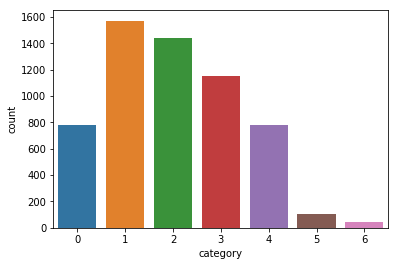

In [68]:
import seaborn as sns

print(df2["category"].value_counts())

sns.countplot(df2["category"])

Etant donné que la répartition des classes n'est pas égale, il y a beaucoup moins d'éléments des classes 5 et 6 que les autres, j'essaye d'utiliser un resampling pour avoir un dataset plus balancé. Cette méthode permettra de diminuer l'oversampling présent notre modèle d'apprentissage. 

Pour cela on va utiliser la méthode de resampling nommée SMOTE. Comme pour l'instant je n'ai pas accès à la bibliothèque imblearn (il faut que je l'installe), j'ai mis en commentaire cette partie que je ferai plus tard.

In [71]:
'''from imblearn.over_sampling import SMOTE



#'cod_cbr','Carrosserie',typ_boite
X = df2.drop(["category"],axis=1)
y = df2["category"]


#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

#Smote
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaler, y_train)


#RandomForest
rforest = RandomForestClassifier(n_jobs = -1,random_state = 64)
rforest.fit(X_train_smote,y_train_smote)

print("\n\n")
print("RANDOM FOREST")
print("Random Forest train : ",rforest.score(X_train_smote,y_train_smote))
print("Random Forest test : ",rforest.score(X_test_scaler,y_test))

y_pred = rforest.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))
'''

'from imblearn.over_sampling import SMOTE\n\n\n\n#\'cod_cbr\',\'Carrosserie\',typ_boite\nX = df2.drop(["category"],axis=1)\ny = df2["category"]\n\n\n#Split\nX_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)\n\n#Scaler\nscaler = StandardScaler()\nscaler.fit(X_train)\nX_train_scaler = scaler.transform(X_train)\nX_test_scaler = scaler.transform(X_test)\n\n#Smote\nsmote = SMOTE()\nX_train_smote, y_train_smote = smote.fit_resample(X_train_scaler, y_train)\n\n\n#RandomForest\nrforest = RandomForestClassifier(n_jobs = -1,random_state = 64)\nrforest.fit(X_train_smote,y_train_smote)\n\nprint("\n\n")\nprint("RANDOM FOREST")\nprint("Random Forest train : ",rforest.score(X_train_smote,y_train_smote))\nprint("Random Forest test : ",rforest.score(X_test_scaler,y_test))\n\ny_pred = rforest.predict(X_test_scaler)\nprint(classification_report(y_test, y_pred))\nprint(pd.crosstab(y_test, y_pred))\n'

J'aimerai bien tester un modèle de Deep Learning pour voir si j'obtiens un meilleur modèle.